# **Alcohol, car crashes and bars in Allegheny County,PA**

## Alcohol Use in the United States:
**Prevalence of Drinking:** According to the 2015 National Survey on Drug Use and Health (NSDUH), 86.4 percent of people ages 18 or older reported that they drank alcohol at some point in their lifetime; 70.1 percent reported that they drank in the past year; 56.0 percent reported that they drank in the past month.

**Prevalence of Binge Drinking and Heavy Alcohol Use:** In 2015, 26.9 percent of people ages 18 or older reported that they engaged in binge drinking in the past month; 7.0 percent reported that they engaged in heavy alcohol use in the past month.2 (See "Definitions" box for definitions of binge drinking and heavy alcohol use.)
### Alcohol-Related Deaths:
An estimated **88,0008 people** (approximately 62,000 men and 26,000 women8) die from alcohol-related causes annually, making alcohol the **third leading preventable cause of death in the United States**. The first is tobacco, and the second is poor diet and physical inactivity.
Only in 2014, alcohol-impaired driving fatalities accounted for **9,967 deaths** (31 percent of overall driving fatalities).

<a href="https://www.niaaa.nih.gov/alcohol-health/overview-alcohol-consumption/alcohol-facts-and-statistics">Source</a>


## Car Crashes in the United States:

The National Safety Council estimates that motor vehicle deaths claimed 40,100 lives in 2017 versus the 2016 total of 40,327. The 2017 assessment is 6% higher than the number of deaths in 2015. If the estimate holds, it will be the second consecutive year that motor vehicle deaths topped 40,000.

About 4.57 million people were injured seriously enough to require medical attention in motor vehicle crashes in 2017, and costs to society totaled $413.8 billion. Both figures are about 1% lower than 2016 calculations.

<a href="https://www.nsc.org/road-safety/safety-topics/fatality-estimates">Source</a>


## Introduction/Business Problem

In this study we will verify if there is any relationship between car crashes and the proximity bars/pubs to where the accident happened in Allegheny County in Pennsylvania (a radius of 500 meters (546 yards) will be used to find if there's any venue that sells alcohol around) 

## The data

To accomplish our goal we will make use of datasets provided by the <a href="https://www.data.gov/catalog-help/">Data.gov</a>, and the venue search tool provided by the <a href="https://developer.foursquare.com/">Foursquare API</a>. 

## Who is this for?

The information obtained here should be interesting to Governmental organizations which could use it to create polices, reinforce traffic safety, design campains aiming the reduction of DUI and reinforcing laws. It also might be of interest of anyone who looks to better understand patterns related to car accidents and drinking problems.

## Methodology

We are going to apply concepts of machine learning not only to verify the relationships between in the data but to also develop a model that can predict what are the chances that a car accident will happen in a place given the number of bars in a radius of 500 meters.
To accoplish that we will try to fit different types of regression (linear, polinomial and logistic) to see which one will bring us the best results.
Once we have our model trainned, a verification of its accuracy will be done by applying the jaccard index.

# The code

First, lets import a few libraries that are going to be used:

In [140]:
import pandas as pd
import numpy as np

In [141]:
# The code was removed by Watson Studio for sharing.

Now, lets load the data into a Pandas data frame the data containing Car Crashes in Allegheny County. This data set can be downloaded <a href="https://data.wprdc.org/datastore/dump/2c13021f-74a9-4289-a1e5-fe0472c89881">here</a> and contain data about car crashes from 2004 until 2017.

In [142]:
car_crashes = pd.read_csv("https://data.wprdc.org/datastore/dump/2c13021f-74a9-4289-a1e5-fe0472c89881")
print("Data set loaded")

Data set loaded


Lets check the size of the data frame:

In [143]:
print("The data set car crashes has", car_crashes.shape)

The data set car crashes has (170365, 190)


As we can see the data set has **170.365 entries** and **190 columns**.

Here is a quick peek of what it looks like:

In [144]:
car_crashes.head()

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2004000001,11,2,2454,02454,2004,1,5,257.0,2.0,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
1,2004000010,11,2,2440,02440,2004,1,5,1027.0,10.0,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,2004000016,11,2,2203,02203,2004,1,5,1839.0,18.0,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,2004000022,11,2,2404,02404,2004,1,6,914.0,9.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,2004000030,11,2,2419,02419,2004,1,5,2230.0,22.0,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN


For this study many of the columns listed won't be used. So, to make things a little easier to understand, lets clean up our data set by dropping the data that won't be used.

In [151]:
car_crashes_c = car_crashes[['PERSON_COUNT', 'VEHICLE_COUNT', 'FATAL_COUNT', 'INJURY_COUNT', 'DEC_LAT', 'DEC_LONG', 'DRINKING_DRIVER', 'STREET_NAME']]

In [152]:
car_crashes_c[0:50]

,PERSON_COUNT,VEHICLE_COUNT,FATAL_COUNT,INJURY_COUNT,DEC_LAT,DEC_LONG,DRINKING_DRIVER,STREET_NAME
0,1,1,0,0,40.3234,-79.9404,1,LEWIS RUN RD
1,1,1,0,1,40.3182,-79.9076,0,COAL VALLEY RD
2,1,1,0,1,40.4886,-80.3371,0,CLINTON FRANKFORT RD
3,3,2,0,1,NaN,NaN,0,NORTH BALPH AV
4,1,2,0,0,NaN,NaN,0,THORNBERRY DR
5,2,2,0,0,NaN,NaN,0,WARREN DR
6,5,3,0,3,40.4188,-80.0494,0,POPLAR ST
7,1,1,0,0,NaN,NaN,0,NaN
8,2,2,0,1,NaN,NaN,0,CLAIRTON BL
9,2,2,0,0,NaN,NaN,0,AMITY ST


In [147]:
car_crashes_c.shape

(170365, 8)

OK, that's a little better! From the example above we can see that there still is one problem that need to be taken care of before we start. 

- There are a some entries that do not have the latitude and longitude.

In [158]:
i=0
for index, row in car_crashes_c.iterrows():
    if np.isnan(row['DEC_LAT']):
        i+=1
print("Total o entries missing coordinates:", i)

Total o entries missing coordinates: 9984


Now, lets try to fix the absence of coordinates of some of the entries.

First by dropping the cases in which we don't have neither the street name nor the coordinates, because in that case we won't be able to retrieve any positional information.

In [159]:
for index, row in car_crashes_c.iterrows():
    if (np.isnan(row['DEC_LAT']) and pd.isnull(row['STREET_NAME'])):
        car_crashes_c.drop(car_crashes_c.index[index], inplace=True)
car_crashes_c.shape

(169581, 8)

That worked.
But, because our data frame is too still large and we depend on web services such as the Geolocator and Foursquare we will have to make our data set smaller. Lets take then only the first 2.000 entries

In [198]:
car_crashes_sm=car_crashes_c[:2000]

We proceed by obtaining the coordinates for the entries that only have the street address:

In [156]:
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

Hmmm... I think we can solve that!
Now, lets try to fix the absence of coordinates of some of the entries.

(this operation takes up to <font color='red'><b> ** 15 minutes ** </b></font> to complete due the use of the geolocator webservice)

In [199]:
for index, row in car_crashes_sm.iterrows():
    if np.isnan(row['DEC_LAT']):
        address = str(row['STREET_NAME']) + ', Allegheny ,PA'
        geolocator = Nominatim()
        location = geolocator.geocode(address)
        if (pd.isnull(location)):
            car_crashes_sm.drop(index, inplace=True)
        else:
            if((location.latitude<40.2 or location.latitude>40.6) or (location.longitude<-80.3 or location.longitude>-79.7)): #if the coordinates found don't belong to Allegheny County removes the entry
                car_crashes_sm.drop(index, inplace=True)
            else:
                car_crashes_sm.loc[index, 'DEC_LAT']=location.latitude
                car_crashes_sm.loc[index, 'DEC_LONG']=location.longitude
    
print("Done retrieving the coordinates!")

Done retrieving the coordinates!


Alright! Time to check how many entries we have left. Note that the addresses that geolocator couldn't find were dropped.

In [200]:
car_crashes_sm.reset_index(drop=True, inplace=True) #fixing the indexes
car_crashes_sm.shape

(1927, 8)

Our data frame now looks like this:

In [195]:
car_crashes_c[0:10]

,PERSON_COUNT,VEHICLE_COUNT,FATAL_COUNT,INJURY_COUNT,DEC_LAT,DEC_LONG,DRINKING_DRIVER,STREET_NAME
0,1,1,0,0,40.323400,-79.940400,1,LEWIS RUN RD
1,1,1,0,1,40.318200,-79.907600,0,COAL VALLEY RD
2,1,1,0,1,40.488600,-80.337100,0,CLINTON FRANKFORT RD
4,1,2,0,0,40.431932,-79.843905,0,THORNBERRY DR
5,2,2,0,0,40.384888,-79.823008,0,WARREN DR
6,5,3,0,3,40.418800,-80.049400,0,POPLAR ST
8,2,2,0,1,40.292294,-79.881718,0,CLAIRTON BL
9,2,2,0,0,40.407426,-79.911299,0,AMITY ST
11,7,2,0,1,40.461200,-80.008700,0,PERRYSVILLE AV
14,2,2,0,2,40.324900,-80.081600,0,WASHINGTON RD


Before we visualise these locations on the map, lets find the average coordinates to better center the map

In [23]:
!pip install folium
import folium # map rendering library

import matplotlib.cm as cm
import matplotlib.colors as colors

    100% |████████████████████████████████| 81kB 6.7MB/s eta 0:00:01
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: jinja2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from folium)
Requirement not upgraded as not directly required: MarkupSafe>=0.23 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jinja2->folium)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->folium)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Python35/

In [281]:
map_accidents = folium.Map(location=[40.44206575,-79.9451083041771], zoom_start=12)

for lat, lon in zip(car_crashes_sm['DEC_LAT'], car_crashes_sm['DEC_LONG']):
    folium.Marker(
        [lat, lon]
    ).add_to(map_accidents)



display(map_accidents)

In [26]:
# The code was removed by Watson Studio for sharing.

In [27]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Lets now check which locations have bars/pubs next to them.

In [209]:
def getNearbyBars(lat, lng): 
                      
        # create the API request URL
        LIMIT = 2000
        radius = 500 #radius = 500 meters 
        categorie_ID='4bf58dd8d48988d116941735' #bars
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT, categorie_ID)
                    
        # make the GET request
        response=requests.get(url).json()['response']
     
    #*************RETURN DATAFRAME*************** 
        #bars_list=pd.DataFrame.from_dict(response['venues']).filter(items=['name','location'])
        #print("For those coordinates were found", len(response['venues']), "bars in a 5 miles radius")
        #bars_list['latitude']=""
        #bars_list['longitude']=""
        #
        #i=0

        #for row in bars_list['location']:
         #   bars_list['longitude'][i]=float(row['lng'])
          #  bars_list['latitude'][i]=float(row['lat'])
           # i+=1
        
    #bars_list.drop(columns=['location'], inplace=True)

        # return only relevant information for each nearby venue
        
    #**********************************************************************************************************
        bars_list = [0]*len(response['venues'])
        for entry in range (len(response['venues'])):
            bars_list[entry] =[response['venues'][entry]['name'],response['venues'][entry]['location']['lat'],response['venues'][entry]['location']['lng']]
           
        return(bars_list)

OK! this is how our data frame looks like now. 

(Disclaimer: This part can take up to <font color='red'><b>** 30 minutes **<b></font> to process due to the enourmous amount of data being fetched from the foursquare API)

In [212]:
car_crashes_sm['count']=''
car_crashes_sm['pubs']=''
for index, row in car_crashes_sm.iterrows():
    car_crashes_sm['pubs'][index]=getNearbyBars(row['DEC_LAT'],row['DEC_LONG'])
    car_crashes_sm['count'][index]=len(car_crashes_sm['pubs'][index])
car_crashes_sm.head()

,PERSON_COUNT,VEHICLE_COUNT,FATAL_COUNT,INJURY_COUNT,DEC_LAT,DEC_LONG,DRINKING_DRIVER,STREET_NAME,count,pubs
0,1,1,0,0,40.323400,-79.940400,1,LEWIS RUN RD,2,"[[Primanti Bros., 40.32399, -79.943729], [Monk..."
1,1,1,0,1,40.318200,-79.907600,0,COAL VALLEY RD,0,[]
2,1,1,0,1,40.488600,-80.337100,0,CLINTON FRANKFORT RD,0,[]
3,1,2,0,0,40.431932,-79.843905,0,THORNBERRY DR,3,"[[tommys bar, 40.4328203607204, -79.8424515183..."
4,2,2,0,0,40.384888,-79.823008,0,WARREN DR,7,"[[Wine and Spirits Stores, 40.383925, -79.8230..."


For the first accident. Here's the list of bars that are close to it

Just for fun. Lets see the list of the bars that are close to a random entry on our list of locations:

In [213]:
from random import randint

random_number=randint(0,len(car_crashes_sm['STREET_NAME']))
    
while len(car_crashes_sm['pubs'][random_number]) == 0:
   random_number=randint(0,len(car_crashes_sm['STREET_NAME']))

print("Our random number is:",random_number,"\n\nThis is a list of all the bars that are in a radius of 500 meters from", car_crashes_sm['STREET_NAME'][random_number],":\n")

for i in range (len(car_crashes_sm['pubs'][random_number])):
    print(i,")\t",car_crashes_sm['pubs'][random_number][i][0])

Our random number is: 567 

This is a list of all the bars that are in a radius of 500 meters from CAROTHERS AV :

0 )	 Little Jim's Club
1 )	 Glendale Firemen's Club
2 )	 Polish Falcons
3 )	 Polish White Eagles
4 )	 Cantleys Nitelife
5 )	 99 Bottles
6 )	 Da Boom Boom Room
7 )	 bus stop at rockey's
8 )	 Duran's
9 )	 Concordia Club
10 )	 polish American Falcons club
11 )	 Zack's
12 )	 Na Na Na Na Batcaveeee


Time to plot a new map!
#### This is how the bars are in the radius of the accident

(you can click on the markers to see the name of the bar)

In [214]:
map_venues = folium.Map(location=[car_crashes_sm['DEC_LAT'][random_number], car_crashes_sm['DEC_LONG'][random_number]], zoom_start=15)
map_venues.add_child(
        folium.Circle(
            [car_crashes_sm['DEC_LAT'][random_number], car_crashes_sm['DEC_LONG'][random_number]],
            radius=800, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.3
        )
    )
map_venues.add_child(
    folium.CircleMarker(
            [car_crashes_sm['DEC_LAT'][random_number], car_crashes_sm['DEC_LONG'][random_number]],
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=folium.Popup(car_crashes_sm['STREET_NAME'][random_number], parse_html=True),
        )
)
for i in range (len(car_crashes_sm['pubs'][random_number])):
    map_venues.add_child(
        folium.CircleMarker(
            [car_crashes_sm['pubs'][random_number][i][1], car_crashes_sm['pubs'][random_number][i][2]],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            popup=folium.Popup(car_crashes_sm['pubs'][random_number][i][0], parse_html=True),
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
display(map_venues)

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

This is the count of the number of bars next to the places where the accidents happened

In [216]:
counts=pd.DataFrame(car_crashes_sm['count'].value_counts())
counts.sort_index(inplace=True)              
counts.index.name = 'number_bars'
counts.reset_index(inplace=True)
counts[:10]

,number_bars,count
0,0,543
1,1,343
2,2,280
3,3,196
4,4,136
5,5,96
6,6,74
7,7,45
8,8,26
9,9,24


To better visualize that information, we are going to create a scater plot for the frequency of the number of bars next to a car crash

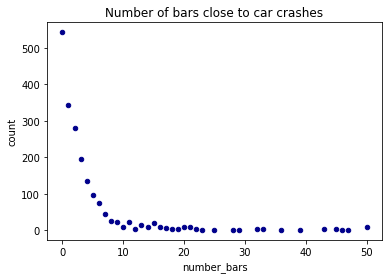

In [217]:
counts.plot.scatter(x='number_bars', y='count', c='DarkBlue', title='Number of bars close to car crashes')


To make it even easier to visualize it we can group the number of bars next to accidents in intervals.

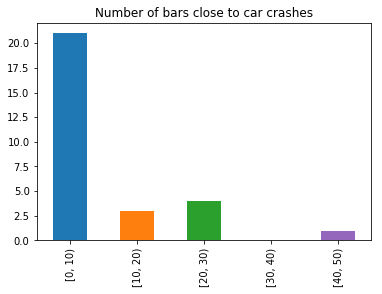

In [219]:
step = 10
bin_range = np.arange(0, 50+step, step)
out, bins  = pd.cut(counts['count'], bins=bin_range, include_lowest=True, right=False, retbins=True)
ax = out.value_counts(sort=False).plot.bar(title='Number of bars close to car crashes', x='number_bars', y='count', )


The data shows us that for a large amount of cases there were a lot of bars close the accident. Notice that in many cases in a small radius of 500 meters there were almost 50 bars near by.

### Finding a model for the data

In this part, we will try to find an equation that fits the data well.
Once armed with that tool we'll be able to mathematically describe the occurence of car crashes and the proximity to bars.


Lets see what happens when we try to apply a linear regression to the results:

		Linear Regression


Text(0.5,1,'Linear regression')

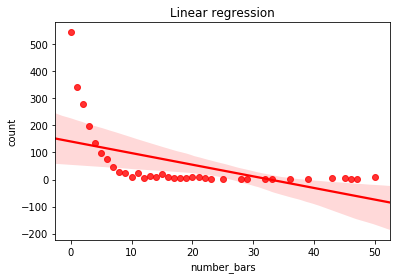

In [220]:
import seaborn as sns
from scipy import stats
print("\t\tLinear Regression")


ax=sns.regplot(counts['number_bars'],counts['count'], color='r',)
ax.set_title('Linear regression')

Well, that was a bit obvious that linear regression wouldn't be a good fit for our data... How about a polinomial regression?

		Polinomial Regression


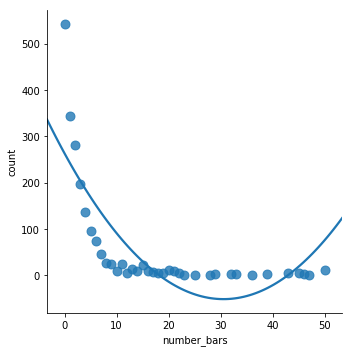

In [221]:
print("\t\tPolinomial Regression")
out2=sns.lmplot(x="number_bars", y="count", data=counts,
           order=2, ci=None, scatter_kws={"s": 80});

It does look better, but not quite there yet.

It's time for us to try a **logistic regression**:

		 Logistic Regression


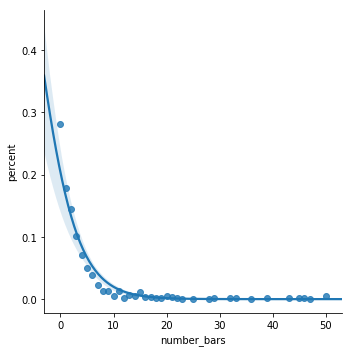

In [222]:
counts['percent']=counts['count']/counts['count'].sum()
print("\t\t Logistic Regression")
sns.lmplot(x="number_bars", y="percent", data=counts, logistic=True, n_boot=25)


That looks great! 
This is probably the best kind regression for our data.


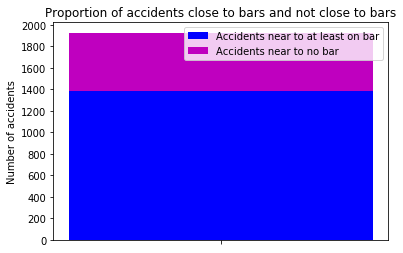

In [223]:
bars   = (counts['count'].sum()-counts['count'][0])
no_bar = (counts['count'][0])


width = 0.35        # the width of the bars: can also be len(x) sequence

p1 = plt.bar(0.5, bars,   width, color='b')
p2 = plt.bar(0.5,no_bar, width, color='m',
             bottom=bars) # specify as going to the bottom

plt.ylabel('Number of accidents')
plt.title('Proportion of accidents close to bars and not close to bars')
plt.xticks([0.5], (''))
plt.yticks(np.arange(0,2200,200))
plt.legend( (p1[0], p2[0]), ('Accidents near to at least on bar', 'Accidents near to no bar') )

plt.show()

As we can see, the chance of a car accident to happen close to a bar is next to <b>72%</b>!

But now, the question is: Where those accidents caused because of drunk drivers?

In [230]:
print("Total of crashes cased by a drunk driver:",car_crashes_sm['DRINKING_DRIVER'].sum(), "out of",len(car_crashes_sm)," accidents")

Total of crashes cased by a drunk driver: 188 out of 1927  accidents


Hmmm.. That's a little less than 10%.
Time to train out data to identify the relationship between bars and car crashes

In [248]:
temp=car_crashes_sm[car_crashes_sm['DRINKING_DRIVER']==1]
counts_diu=pd.DataFrame(temp['count'].value_counts())
counts_diu.sort_index(inplace=True)              
counts_diu.index.name = 'number_bars'
counts_diu.reset_index(inplace=True)
counts_diu[:10]

,number_bars,count
0,0,67
1,1,35
2,2,23
3,3,15
4,4,10
5,5,11
6,6,9
7,7,3
8,9,2
9,10,3


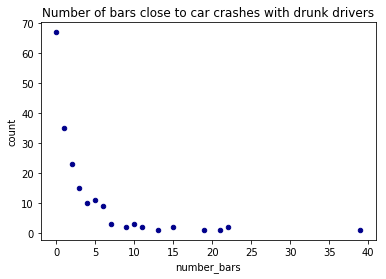

In [251]:
#counts.plot.scatter(x='number_bars', y='count', c='DarkBlue', title='Number of bars close to car crashes')
counts_diu.plot.scatter(x='number_bars', y='count', c='DarkBlue', title='Number of bars close to car crashes with drunk drivers')


In [253]:
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing


Lets define X, and y for our dataset:

In [257]:
X = np.asarray(car_crashes_sm[['count']])

In [258]:
y = np.asarray(car_crashes_sm[['DRINKING_DRIVER']])

Now, we normalize the dataset:

In [259]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.25473628],
       [-0.55830882],
       [-0.55830882],
       [-0.10295   ],
       [ 0.50419509]])

## Trainning the model

We are gonna split the data set in two pieces. the trainning part will be 80% to the total and the test part will have the 20% left

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1541, 1) (1541, 1)
Test set: (386, 1) (386, 1)


# RESULTS

Now that the model was trainned we can predict using our test set:

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [277]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.81,  0.19],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.83,  0.17],
       [ 0.8 ,  0.2 ],
       [ 0.82,  0.18],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.81,  0.19],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.82,  0.18],
       [ 0.81,  0.19],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.82,  0.18],
       [ 0.8 ,  0.2 ],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.8 ,  0.2 ],
       [ 0.81,  0.19],
       [ 0.81,  0.19],
       [ 0.

Lets use the **jaccard** index to see how good our model is. The closer to 1, the better is the model

In [278]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9196891191709845

# Discussion

As we can see, a result of ~92% is really high score. That enable us to validate the model as really good.
Other tests should be done on the data set looking for more relations. We proved that it it's possible to create a model that can predict the occurence of car crashes near a number of bars, but one can try to find if there's any other variable that can influence the results and even enable the design of a more complete model.

# Conclusion

After developing a model we can confidently predict the chances that there will be a car crash caused by a drunk driver in a place that's in a 500m radius according to the number of bars near by.
The model proposed here can help authorities to manage the placement of rescue units and police cars. Beyond that informative campains can be more persuasive in those places.
Those things combined can effectively help to reduce the number of accidents and save lives